### Крупные библиотеки NLP

#### NLTK

NLTK - одна из самых первых библиотек такого рода; она огромная и содержит очень много разных инструментов, некоторые из них никак не связаны между собой (в отличие от spacy). NLTK - больше исследовательская библиотека, конструктор своего рода. Для NLTK есть учебник, написанный авторами: [NLTK book](https://www.nltk.org/book/). Для этого учебника специально существует подмодуль book, который обычно импортируется целиком:

In [ ]:
import nltk 
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


В этом модуле есть некий набор текстов и набор предложений, с которыми можно поиграться. 

Центральный объект для NLTK (по крайней мере, при работе с корпусами) - это Text (nltk.text.Text). По сути, в этом объекте содержится сам текст в виде списка токенов, но у него есть дополнительные методы. Что можно делать с объектом класса Text?

In [2]:
text1.concordance('Moby', width=100, lines=5)

Displaying 5 of 84 matches:
[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Su
hat white whale must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye k
 must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye know the white w
ib in a squall . Death and devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" 
 devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," said Sta


Конкорданс ищет первые n вхождений заданного слова с шириной контекста width. 

In [3]:
text1.similar('whale', num=20)

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


similar возвращает num слов, которые встречаются в похожих контекстах (дистрибутивная похожесть). 

In [4]:
text1.common_contexts(['whale', 'ship'])  # тоже можно задать параметр num

the_s the_and the_is the_in the_the the_as the_was the_which the_i
a_in the_has the_when the_had the_with the_to the_by the_so the_that
the_would the_a


common_contexts ищет те самые совпадающие контексты. 

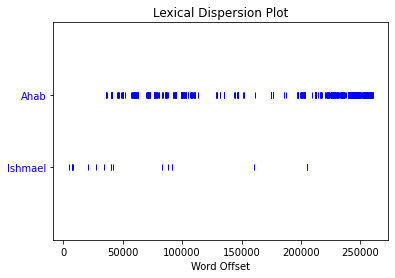

In [5]:
text1.dispersion_plot(['Ahab', 'Ishmael'])

Можно построить график распределения слов по тексту (без NumPy и matplotlib график не работает, поэтому установите эти две библиотеки, если еще не). 

In [6]:
text1.count('Moby')

84

Можно посчитать количество вхождений какого-то слова. Кстати, к текстам можно применять обычные функции len(), set() и подобные. И срезы с индексами работают!

In [7]:
text1.generate(length=100)

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . have been'

Можно сгенерировать текст, "похожий" на оригинальный. Это делается с помощью n-грамов (или n-грамм, я видела разные варианты по-русски...): nltk просто в случайном порядке совмещает эти n-грамы. Как можно видеть, не слишком полезный метод, однако можно побаловаться. 

Важнее то, что в nltk есть утилиты для работы с n-грамами:

In [8]:
from nltk.util import ngrams # bigrams

list(ngrams(sent9, 3))

[('THE', 'suburb', 'of'),
 ('suburb', 'of', 'Saffron'),
 ('of', 'Saffron', 'Park'),
 ('Saffron', 'Park', 'lay'),
 ('Park', 'lay', 'on'),
 ('lay', 'on', 'the'),
 ('on', 'the', 'sunset'),
 ('the', 'sunset', 'side'),
 ('sunset', 'side', 'of'),
 ('side', 'of', 'London'),
 ('of', 'London', ','),
 ('London', ',', 'as'),
 (',', 'as', 'red'),
 ('as', 'red', 'and'),
 ('red', 'and', 'ragged'),
 ('and', 'ragged', 'as'),
 ('ragged', 'as', 'a'),
 ('as', 'a', 'cloud'),
 ('a', 'cloud', 'of'),
 ('cloud', 'of', 'sunset'),
 ('of', 'sunset', '.')]

Функция ngrams (или bigrams) возвращает список всех н-грамов списка токенов, который ей дать. N-грамы еще принимают число n. 

У класса Text есть метод, который возвращает коллокации (частотные н-грамы):

In [11]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Как создать собственный объект класса Text? Достаточно токенизировать свой текст (любым токенизатором) и передать его в класс:

In [ ]:
mytext = Text(tokens)

У nltk есть и свой токенизатор и сентенайзер:

In [1]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize('My beautiful sentence is here.')
tokens

['My', 'beautiful', 'sentence', 'is', 'here', '.']

In [2]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize('''Можно сгенерировать текст, "похожий" на оригинальный. Это делается с помощью n-грамов (или n-грамм, я видела разные варианты по-русски...): nltk просто в случайном порядке совмещает эти n-грамы. Как можно видеть, не слишком полезный метод, однако можно побаловаться.''')
sents

['Можно сгенерировать текст, "похожий" на оригинальный.',
 'Это делается с помощью n-грамов (или n-грамм, я видела разные варианты по-русски...): nltk просто в случайном порядке совмещает эти n-грамы.',
 'Как можно видеть, не слишком полезный метод, однако можно побаловаться.']

#### SpaCy

Спейси - более современная библиотека, которая написана в Cython и использует нейронные сети. Интерфейс спейси довольно удобный и однообразный. Центральное понятие для спейси - это pipeline: то есть, набор действий, которые спейси совершает с текстом. Чтобы обработать текст на любом из языков, представленных в библиотеке ([список](https://spacy.io/usage/models)), достаточно завести пустой пайплайн:

In [1]:
import spacy

nlp = spacy.blank('en')
doc = nlp('My beautiful sentence is here.')

Предупреждения может выдавать библиотека tensorflow, которая сообщает, что у вас не настроена CUDA, но их можно игнорировать, как и предлагается. 

Пустой пайплайн превращает наш текст в особый объект, в котором текст разделен на токены, и можно у этих токенов смотреть самые простые характеристики:

In [2]:
for token in doc:
    print(f'№ {token.i}. Токен: {token.text:>15}. Является словом: {token.is_alpha}. Является пунктуацией: {token.is_punct}. Похож на число: {token.like_num}')

№ 0. Токен:              My. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 1. Токен:       beautiful. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 2. Токен:        sentence. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 3. Токен:              is. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 4. Токен:            here. Является словом: True. Является пунктуацией: False. Похож на число: False
№ 5. Токен:               .. Является словом: False. Является пунктуацией: True. Похож на число: False


Объект doc также позволяет смотреть спаны (несколько токенов, срез текста):

In [3]:
span = doc[1:3]
span.text

'beautiful sentence'

Ну, это все прекрасно, но хотелось бы чего-то большего. Для spacy есть довольно много предобученных моделей для разных языков (список см. выше). Модельки нужно устанавливать (скачивать) с помощью команды в командной строке - она написана у них на сайте (python -m spacy download имя_модели). Когда вы загрузили модельку, вы можете ее использовать в коде:

In [4]:
nlp = spacy.load('en_core_web_lg')

Теперь уже можно получить сведения поинтереснее:

In [5]:
doc = nlp('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')

In [14]:
for token in doc:
    print(f'{token.i:2}. {token.text:15} POS: {token.pos_:6} SyntR: {token.dep_:9} Head: {token.head.text}')

 0. The             POS: DET    SyntR: det       Head: Army
 1. 4th             POS: ADJ    SyntR: amod      Head: Army
 2. Army            POS: PROPN  SyntR: nsubj     Head: was
 3. was             POS: AUX    SyntR: ROOT      Head: was
 4. a               POS: DET    SyntR: det       Head: formation
 5. Royal           POS: PROPN  SyntR: compound  Head: Army
 6. Yugoslav        POS: ADJ    SyntR: amod      Head: Army
 7. Army            POS: PROPN  SyntR: compound  Head: formation
 8. formation       POS: NOUN   SyntR: attr      Head: was
 9. mobilised       POS: VERB   SyntR: acl       Head: formation
10. prior           POS: ADV    SyntR: advmod    Head: mobilised
11. to              POS: ADP    SyntR: prep      Head: prior
12. the             POS: DET    SyntR: det       Head: invasion
13. German          POS: PROPN  SyntR: npadvmod  Head: led
14. -               POS: PUNCT  SyntR: punct     Head: led
15. led             POS: VERB   SyntR: amod      Head: invasion
16. invasion    

Грамматические характеристики можно тоже посмотреть:

In [15]:
for token in doc[:3]:
    print(token.morph)

Definite=Def|PronType=Art
Degree=Pos
Number=Sing


Также spacy позволяет разметить именованные сущности и посмотреть, что получилось:

In [7]:
for ent in doc.ents:
    print(f'Entity: {ent.text:30} Label: {ent.label_}')

Entity: The 4th Army                   Label: ORG
Entity: Royal Yugoslav Army            Label: ORG
Entity: German                         Label: NORP
Entity: the Kingdom of Yugoslavia      Label: GPE
Entity: World War II                   Label: EVENT


Если аббревиатуры вас смущают, spacy легко предоставит расшифровки (для всех!):

In [33]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [34]:
spacy.explain('pobj')

'object of preposition'

Итак, а теперь самое интересное - это обертки для spacy + udpipe. UD, как известно - очень известный и влиятельный проект (чешский), цель которого - унифицировать тагсет для всех языков мира, причем как в морфологии, так и в синтаксисе. Неудивительно, что, поскольку в UD существует большое количество размеченных датасетов (русским языком активно занималась О. Ляшевская), то они обучили и свой парсер. Сам парсер написан в плюсах и не очень дружелюбен, но обертки для spacy делают жизнь проще. 

Внимание: я обычно это забываю, но прежде чем установить udpipe, **нужно поставить C++ Build Tools** (с сайта майкрософт, это бесплатно). Это нужно, чтобы скомпилировать udpipe из исходников в сях. Адрес сайта, откуда брать их, сам pip обычно подсказывает, но в целом можно просто погуглить. 

Две оболочки для udpipe, которые мы посмотрели - это spacy_udpipe и corpy. Обе нужно устанавливать:

    pip install spacy_udpipe
    pip install corpy
    
Для spacy_udpipe вообще ничего больше не нужно, там максимально автоматизированно скачиваются модельки. Для corpy приходится скачивать искомую модель руками, [отсюда](https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-3131). Эту модель вы можете положить куда угодно, главное потом указать corpy путь к ней. 

In [35]:
import spacy_udpipe

spacy_udpipe.download('en')  # эту команду достаточно выполнить только один раз - она как nltk.download()

Already downloaded a model for the 'en' language


In [37]:
nlp = spacy_udpipe.load('en')
doc = nlp('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')
for token in doc:
    print(f'{token.i:2}. {token.text:15} Lemma: {token.lemma_:15} POS: {token.pos_:6} SyntR: {token.dep_:9} Head: {token.head.text}')

 0. The             Lemma: the             POS: DET    SyntR: det       Head: Army
 1. 4th             Lemma: 4th             POS: ADJ    SyntR: amod      Head: Army
 2. Army            Lemma: Army            POS: PROPN  SyntR: nsubj     Head: formation
 3. was             Lemma: be              POS: AUX    SyntR: cop       Head: formation
 4. a               Lemma: a               POS: DET    SyntR: det       Head: formation
 5. Royal           Lemma: Royal           POS: PROPN  SyntR: compound  Head: Army
 6. Yugoslav        Lemma: Yugoslav        POS: PROPN  SyntR: compound  Head: Army
 7. Army            Lemma: Army            POS: PROPN  SyntR: compound  Head: formation
 8. formation       Lemma: formation       POS: NOUN   SyntR: nsubj     Head: mobilised
 9. mobilised       Lemma: mobilise        POS: VERB   SyntR: ROOT      Head: mobilised
10. prior           Lemma: prior           POS: ADJ    SyntR: case      Head: invasion
11. to              Lemma: to              POS: ADP  

То же самое можно сделать в corpy:

In [38]:
from corpy.udpipe import Model

model = Model('english-partut-ud-2.5-191206.udpipe')  
# тут и нужно указать путь к вашей модели. Если она лежит в той же папке, что и скрипт, достаточно только имени файла

sents = model.process('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')

corpy возвращает генератор (то есть, итерируемый объект, который как магазин автомата, расстреляли все патроны - он опустел; повторно по генератору итерироваться нельзя). Генератор на каждом шаге выдает предложение (объект специального класса Sentence()), а в предложении - объекты класса Word(). 

In [40]:
for sent in sents:
    for word in sent.words:
        print(f'{word.form:15} Лемма: {word.lemma:15} POS: {word.upostag} Грам. инфа: {word.feats}')
print('Алилуя!')

<root>          Лемма: <root>          POS: <root> Грам. инфа: <root>
The             Лемма: the             POS: DET Грам. инфа: Definite=Def|PronType=Art
4th             Лемма: 4th             POS: ADJ Грам. инфа: Degree=Pos
Army            Лемма: army            POS: NOUN Грам. инфа: Number=Sing
was             Лемма: be              POS: AUX Грам. инфа: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
a               Лемма: a               POS: DET Грам. инфа: Definite=Ind|Number=Sing|PronType=Art
Royal           Лемма: royal           POS: PROPN Грам. инфа: 
Yugoslav        Лемма: Yugoslav        POS: PROPN Грам. инфа: 
Army            Лемма: army            POS: PROPN Грам. инфа: 
formation       Лемма: formation       POS: NOUN Грам. инфа: Number=Sing
mobilised       Лемма: mobilize        POS: VERB Грам. инфа: Mood=Ind|Person=3|Tense=Past|VerbForm=Fin
prior           Лемма: prior           POS: ADJ Грам. инфа: Degree=Pos
to              Лемма: to              POS: ADP Грам

у corpy, кстати, есть свой способ вывода имеющейся информации (хотя, по-моему, в юпитере и так красиво выводится...)

In [43]:
from corpy.udpipe import pprint

pprint(list(model.process('The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.')))

[Sentence(
   comments=[
     '# newdoc',
     '# newpar',
     '# sent_id = 1',
     '# text = The 4th Army was a Royal Yugoslav Army formation mobilised prior to the German-led invasion of the Kingdom of Yugoslavia during World War II.'],
   words=[
     Word(id=0, <root>),
     Word(id=1,
          form='The',
          lemma='the',
          xpostag='RD',
          upostag='DET',
          feats='Definite=Def|PronType=Art',
          head=3,
          deprel='det'),
     Word(id=2,
          form='4th',
          lemma='4th',
          xpostag='A',
          upostag='ADJ',
          feats='Degree=Pos',
          head=3,
          deprel='amod'),
     Word(id=3,
          form='Army',
          lemma='army',
          xpostag='S',
          upostag='NOUN',
          feats='Number=Sing',
          head=9,
          deprel='nsubj'),
     Word(id=4,
          form='was',
          lemma='be',
          xpostag='V',
          upostag='AUX',
          feats='Mood=Ind|Number=Sing|Person=3